# Chirp, BoA 30, varying frequency 0.05 -> 0.5 in 9000 timesteps
## Use the modified model that has BoA and Frequency output separtely

In [1]:
from tensorflow import keras
import numpy as np
from sklearn.metrics import confusion_matrix
from collections import Counter
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

In [2]:
model = keras.models.load_model("/Volumes/KleeFD/models/Chirp/one model two outputs.h5")

In [3]:
dir = "/Volumes/KleeFD/dataset/dataset_chirp/01_boa25_f0p05f0p5"

## TEST DATA

In [4]:
test_X = np.load(dir + '/Chirp_BoA25_f0p05f0p5_L09000.npy')
freq = (np.load(dir + '/FREQ_Chirp_BoA25_f0p05f0p5_L09000.npy'))
angle = (np.load(dir + '/ANGLE_Chirp_BoA25_f0p05f0p5_L09000.npy'))

boa_cat = [25.0, 30.0]

freq_cat = [0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5]

In [5]:
# Get Predictions (reverse to_categorical)
pred_proba = model.predict(test_X)

29/29 [==============================] - 2s 56ms/step


In [6]:
pred_proba_boa = pred_proba[1]
pred_proba_freq = pred_proba[0]

boa_pred_idx = np.argmax(pred_proba_boa, axis = 1)
freq_pred_idx = np.argmax(pred_proba_freq, axis = 1)

In [7]:
boa_pred = []
freq_pred = []

for b,f in zip(boa_pred_idx, freq_pred_idx):
    boa_pred.append(boa_cat[b])
    freq_pred.append(freq_cat[f])

## Freqency Prediction

Text(0.5, 0, 'Time Step')

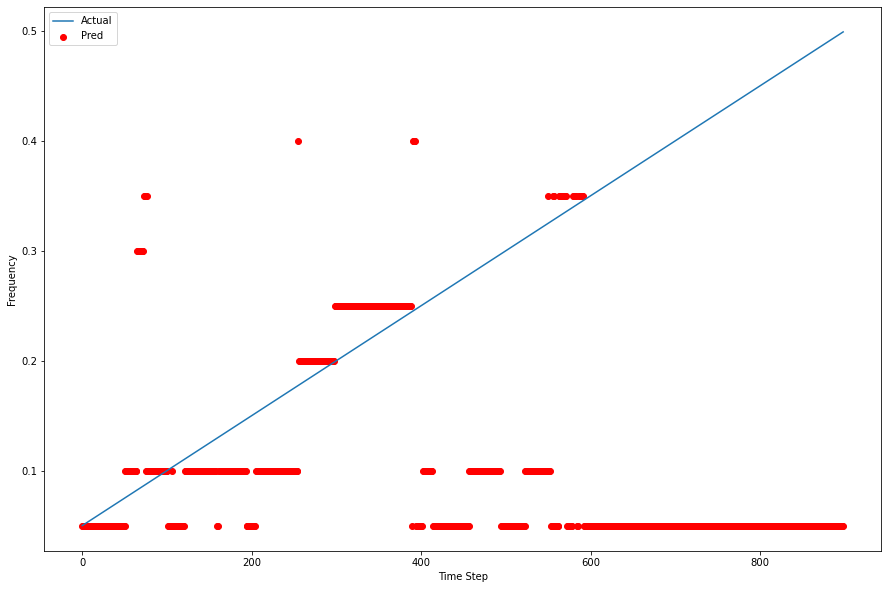

In [8]:
plt.figure(figsize = (15,10))
plt.plot(list(range(len(freq))), freq, label = 'Actual')
plt.scatter(list(range(len(freq))), freq_pred, c = 'r', label = 'Pred')
plt.legend()
plt.ylabel("Frequency")
plt.xlabel("Time Step")

## It doesn't seem to be working well...
- categorize the frequencies (which is linear now). In that case, is the model working?

In [9]:
## RANGE 0.05 - 0.10 - ----..... Is the prediction in the correct range??

freq_cat = np.array([0, 0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6])

# Set threshold values to be the mean value between two categoires. i.e. if 0.075 < x < 0.15 then 0.1
thres = []
for i in range(8):
    thres.append(tuple([(freq_cat[i+1] + freq_cat[i])/2, (freq_cat[i+1] + freq_cat[i+2])/2]))

print("# of cat:",len(thres))

# Make correct label according to that.
categorized_freq = []
for f in freq:
    for cat_num in range(8):
        bound = thres[cat_num]
        if bound[0] < f and bound[1] > f:
            categorized_freq.append(cat_num)
            
print(len(categorized_freq))

# of cat: 8
899


In [10]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
categorized_freq = np.array(categorized_freq).reshape(-1,1)
categorized_freq_pred = []
freq_cat = np.array([0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5])
for p in freq_pred:
    categorized_freq_pred.append(np.where(freq_cat == p)[0][0])
categorized_freq_pred = np.array(categorized_freq_pred).reshape(-1,1)

Confusion matrix, without normalization


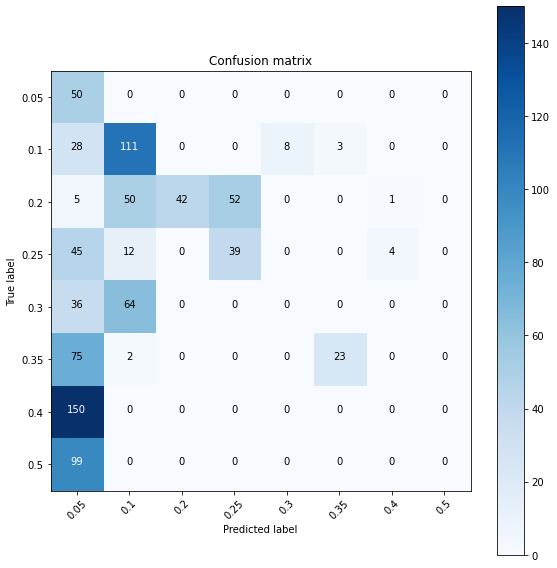

In [12]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(categorized_freq, categorized_freq_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes = freq_cat, normalize=False,
                      title='Confusion matrix')
plt.show()

In [13]:
print(classification_report(categorized_freq, categorized_freq_pred))

              precision    recall  f1-score   support

           0       0.10      1.00      0.19        50
           1       0.46      0.74      0.57       150
           2       1.00      0.28      0.44       150
           3       0.43      0.39      0.41       100
           4       0.00      0.00      0.00       100
           5       0.88      0.23      0.37       100
           6       0.00      0.00      0.00       150
           7       0.00      0.00      0.00        99

    accuracy                           0.29       899
   macro avg       0.36      0.33      0.25       899
weighted avg       0.40      0.29      0.26       899



/Users/kunwoosmac/miniconda3/envs/tf25/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kunwoosmac/miniconda3/envs/tf25/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kunwoosmac/miniconda3/envs/tf25/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [14]:
a = np.array(categorized_freq == categorized_freq_pred)

correct = 0

for boolean in a:
    if boolean == True:
        correct += 1
print("ACCURACY :", correct/len(a)*100)

ACCURACY : 29.477196885428253


- previous accuracy was 31% when two outputs were tied.
- maybe the previous output was getting benefitted from the accuracy of boa prediction

## BoA Prediction

In [15]:
from collections import Counter
c = Counter(boa_pred)

tf = c[25.0]
tt = c[30.0]

Counter({25.0: 591, 30.0: 308})

In [16]:
print("Error (two separate outputs) : {}".format(tf*100))

Error when two outputs were tied : 4.560622914349278, Error when two separate output : 1.1123470522803114


## The error got much smaller

In [17]:
for i in range(len(boa_pred)):
    if boa_pred[i] == 25.0:
        print("index: {:<4}, freq: {:<20}, prediction: {:<4}, instantaneous angle: {:<10}".format(i, freq[i], freq_pred[i], 30 - 5*angle[i]))

index: 0   , freq: 0.05045             , prediction: 0.05, instantaneous angle: 25.002034593484787
index: 1   , freq: 0.05095             , prediction: 0.05, instantaneous angle: 25.009246160474476
index: 2   , freq: 0.05145             , prediction: 0.05, instantaneous angle: 25.021955756270977
index: 3   , freq: 0.05195             , prediction: 0.05, instantaneous angle: 25.040458845935227
index: 4   , freq: 0.052450000000000004, prediction: 0.05, instantaneous angle: 25.065048750579425
index: 5   , freq: 0.052950000000000004, prediction: 0.05, instantaneous angle: 25.09601538175942
index: 6   , freq: 0.053450000000000004, prediction: 0.05, instantaneous angle: 25.13364388793196
index: 7   , freq: 0.053950000000000005, prediction: 0.05, instantaneous angle: 25.178213212784765
index: 8   , freq: 0.054450000000000005, prediction: 0.05, instantaneous angle: 25.229994565812234
index: 9   , freq: 0.05495             , prediction: 0.05, instantaneous angle: 25.289249806130353
index: 10  ,

# Conclusion
- Need new model that is feeded with chirp signal as well.
- Will it work if the model is feeded with chirp signal that is slowly changing to predict the slowly changing case?
- If so, can it predict more rapidly changing case?